(6, 2)
X:  [[1.  1.4]
 [1.  1. ]
 [1.  1.5]
 [1.  3. ]
 [1.  3.8]
 [1.  4.1]]
y:  [0. 0. 0. 1. 1. 1.]


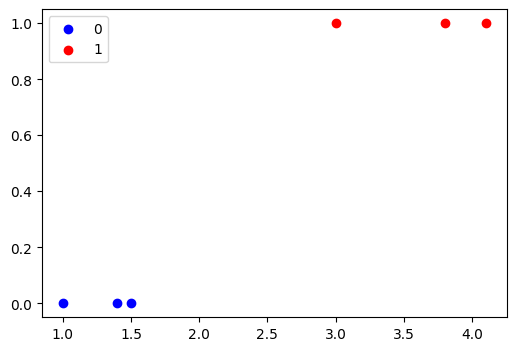

In [3]:
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt('iris_1D.csv', dtype=None, delimiter=',', skip_header=1) 
print(iris.shape)
X = iris[:, :1]
y = iris[:, 1]

plt.figure(figsize=(6, 4))
plt.scatter(X[y == 0][:, 0], y[y == 0], color='b', label='0')
plt.scatter(X[y == 1][:, 0], y[y == 1], color='r', label='1')
plt.legend()

intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

print('X: ', X)
print('y: ', y)

In [4]:
def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))

def loss_function(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

def predict(X, theta):    
    h = sigmoid_function(np.dot(X, theta))
    return h.round()

lr = 0.01
num_iter = 5000

theta = np.array([0.01, -0.01])

losses = []
accs   = []

for i in range(num_iter):
    # compute output
    z = np.dot(X, theta)
    y_hat = sigmoid_function(z)
    
    # compute loss
    loss = loss_function(y_hat, y)

    # compute mean of gradient
    gradient = np.dot(X.T, (y_hat - y)) / y.size
    
    # compute gradient
    theta -= lr*gradient 

    # loss
    losses.append(loss)

    # accuracy
    preds = predict(X, theta)
    acc = (preds == y).mean()
    accs.append(acc)

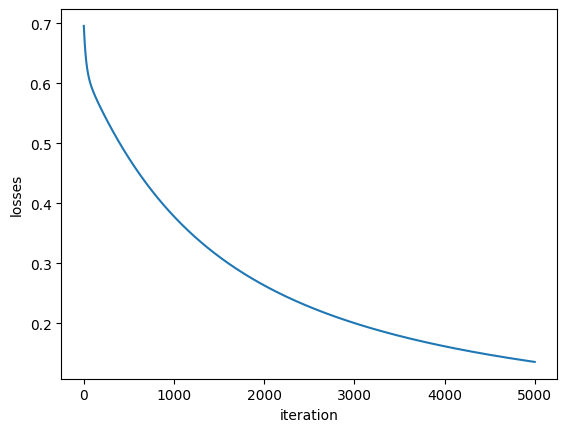

In [5]:
import matplotlib.pyplot as plt

plt.plot(losses[1:])
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()

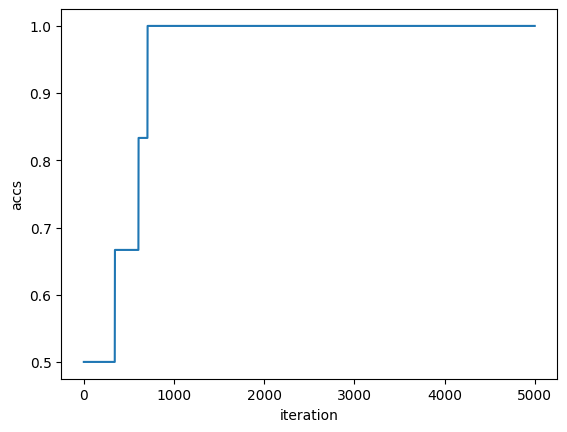

In [6]:
import matplotlib.pyplot as plt

plt.plot(accs[1:])
plt.xlabel('iteration')
plt.ylabel('accs')
plt.show()